In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [5]:
df=pd.read_csv("titanic.csv")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [9]:
df["age"].fillna(df["age"].median(), inplace=True)            #HATALI VERİ DÜZENLEME
df["embarked"].fillna(df["embarked"].mode()[0], inplace=True)
df["fare"].fillna(df["fare"].mean(),inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23248\3903727294.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].fillna(df["age"].median(), inplace=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23248\3903727294.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [13]:
le=LabelEncoder()                                 #LABEL ENCODİNG
df["sex_encoded"]=le.fit_transform(df["sex"])
df[["sex","sex_encoded"]].head()

,sex,sex_encoded
0,male,1
1,female,0
2,female,0
3,female,0
4,male,1


In [19]:
df["embarked_mapped"]=df["embarked"].map({"C":0,"Q":1,"S":2})      ##MANUAL MAP ENCODİNG
df[["embarked","embarked_mapped"]].head(10)

,embarked,embarked_mapped
0,S,2
1,C,0
2,S,2
3,S,2
4,S,2
5,Q,1
6,S,2
7,S,2
8,S,2
9,C,0


In [23]:
embarked_dummies=pd.get_dummies(df["embarked"], prefix="embarked")       #ON HİT ENCODİNG 
df=pd.concat([df,embarked_dummies], axis=1)      #OLUŞTURDUĞUMUZ YENİ SUTÜNLARI YATAYDA EKLİYORUZ.
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,sex_encoded,embarked_mapped,embarked_C,embarked_Q,embarked_S
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1,2,False,False,True
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0,0,True,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0,2,False,False,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0,2,False,False,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1,2,False,False,True


In [25]:
scaler=MinMaxScaler()                                  #BÜYÜK SAYILI VERİLERİ OKURKEN HATA YAPMASIN DİYE VERİYİ 0-1 ARASINDA SIKIŞTIRDIK.
df[["age_scaled","fare_scaled"]]=scaler.fit_transform(df[["age","fare"]])
df[["age_scaled","fare_scaled"]].head()

,age_scaled,fare_scaled
0,0.271174,0.014151
1,0.472229,0.139136
2,0.321438,0.015469
3,0.434531,0.103644
4,0.434531,0.015713


In [27]:
df_encoded=df[["sex_encoded","embarked_mapped","age_scaled","fare_scaled","survived"]] #ENCODİNG YAPTIGIMIZ TÜM VERİLERİ TOPLUYORUZ.
df_encoded.head()

,sex_encoded,embarked_mapped,age_scaled,fare_scaled,survived
0,1,2,0.271174,0.014151,0
1,0,0,0.472229,0.139136,1
2,0,2,0.321438,0.015469,1
3,0,2,0.434531,0.103644,1
4,1,2,0.434531,0.015713,0


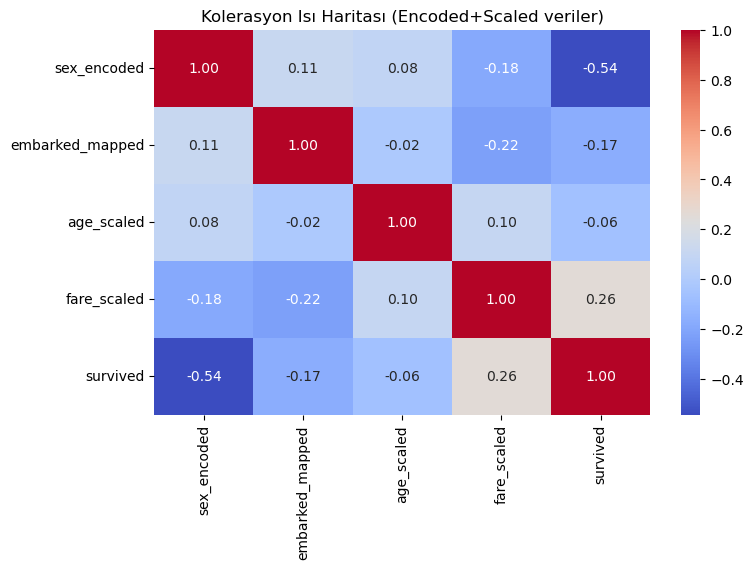

In [29]:
plt.figure(figsize=(8,5))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Kolerasyon Isı Haritası (Encoded+Scaled veriler)")
plt.show()